In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/content/Olympics_Dataset.xlsx")

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [23]:
# Removing Null Values
df.dropna(inplace=True)

In [21]:
 df.isnull()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271082,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
#Total Paarticipants Country
df["NOC"].nunique()

143

In [29]:
#Top 10 Countries
medal_count = df.groupby('NOC').size().reset_index(name='MedalCount')

# Step 3: Sort the countries by the total number of medals in descending order
sorted_medal_count = medal_count.sort_values(by='MedalCount', ascending=False)

# Step 4: Select the top 10 countries
top_10_countries = sorted_medal_count.head(10)

# Step 5: Display the results
print(top_10_countries)

     NOC  MedalCount
135  USA        4383
133  URS        2246
47   GER        1612
5    AUS        1206
107  RUS        1134
64   ITA        1060
18   CAN        1060
44   GBR        1031
45   GDR         995
41   FRA         987


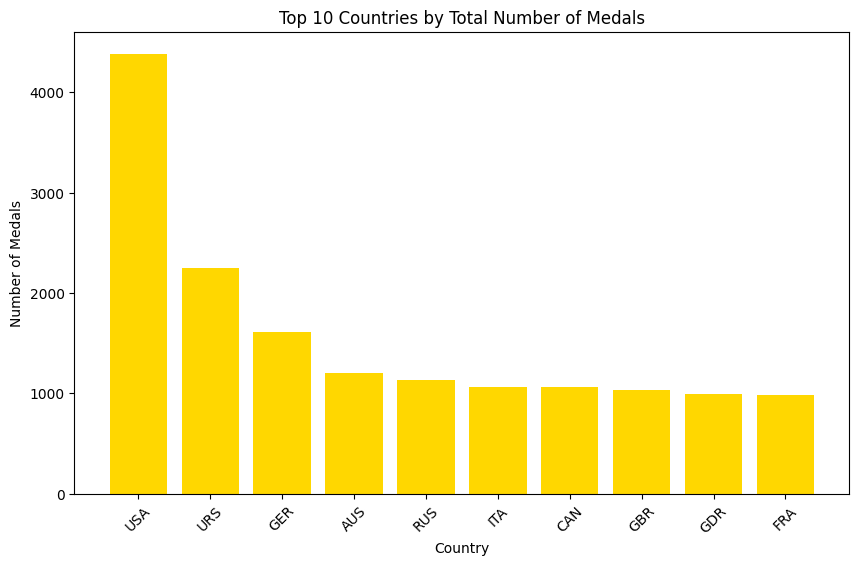

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['NOC'], top_10_countries['MedalCount'], color='gold')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Top 10 Countries by Total Number of Medals')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Group by Country and Gender and count the number of medals
medals_by_gender = df.groupby(['Sex']).size().reset_index(name='MedalCount')

# Display the results
print(medals_by_gender)

  Sex  MedalCount
0   F       10350
1   M       19831


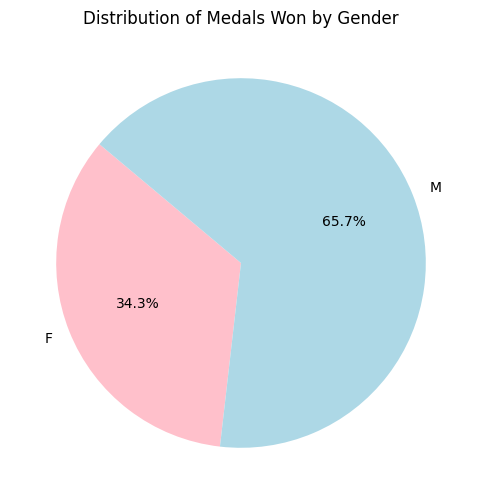

In [42]:
plt.figure(figsize=(6, 6))
plt.pie(
    medals_by_gender['MedalCount'],  # Values for the pie chart
    labels=medals_by_gender['Sex'],  # Labels for each slice
    autopct='%1.1f%%',  # Format to display percentages on slices
    startangle=140,  # Starting angle of the pie chart
    colors=['pink','lightblue' ]  # Optional: colors for each slice
)
plt.title('Distribution of Medals Won by Gender')
plt.show()

In [47]:

# Step 2: Group by athlete's name and medal type, and count the number of each type of medal
medal_counts = df.groupby(['Name', 'Medal']).size().reset_index(name='Count')

# Step 3: Pivot the table to have medal types as columns
medal_counts_pivot = medal_counts.pivot(index='Name', columns='Medal', values='Count').fillna(0)

# Step 4: Calculate the total number of medals for each athlete
medal_counts_pivot['Total'] = medal_counts_pivot.sum(axis=1)

# Step 5: Sort the athletes by total medals in descending order
sorted_medal_counts = medal_counts_pivot.sort_values(by='Total', ascending=False)

# Step 6: Select the top 10 athletes
top_10_medalists = sorted_medal_counts.head(10)

# Display the results
print(top_10_medalists)


Medal                                            Bronze  Gold  Silver  Total
Name                                                                        
Michael Fred Phelps, II                             2.0  23.0     3.0   28.0
Larysa Semenivna Latynina (Diriy-)                  4.0   9.0     5.0   18.0
Nikolay Yefimovich Andrianov                        3.0   7.0     5.0   15.0
Ole Einar Bjrndalen                                 1.0   8.0     4.0   13.0
Borys Anfiyanovych Shakhlin                         2.0   7.0     4.0   13.0
Takashi Ono                                         4.0   5.0     4.0   13.0
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     1.0   8.0     3.0   12.0
Sawao Kato                                          1.0   8.0     3.0   12.0
Natalie Anne Coughlin (-Hall)                       5.0   3.0     4.0   12.0
Ryan Steven Lochte                                  3.0   6.0     3.0   12.0


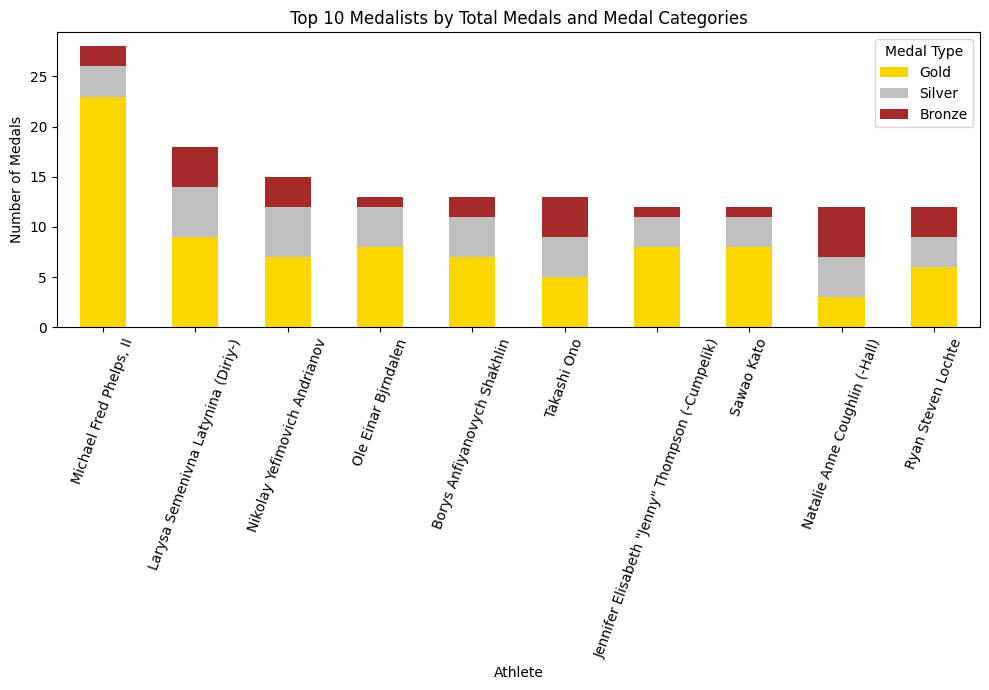

In [51]:
top_10_medalists[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, figsize=(10, 7), color=['gold', 'silver', 'brown'])

plt.title('Top 10 Medalists by Total Medals and Medal Categories')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=70)
plt.legend(title='Medal Type')
plt.tight_layout()

# Show the plot
plt.show()

In [52]:
# Step 2: Group by Year and Sex and count unique participants
participants_by_gender_year = df.groupby(['Year', 'Sex'])['Name'].nunique().reset_index(name='Count')

# Display the results
print(participants_by_gender_year)


    Year Sex  Count
0   1896   M      9
1   1900   M     20
2   1904   M     34
3   1906   M     45
4   1908   M    106
..   ...  ..    ...
59  2012   M    944
60  2014   F    211
61  2014   M    264
62  2016   F    874
63  2016   M    972

[64 rows x 3 columns]


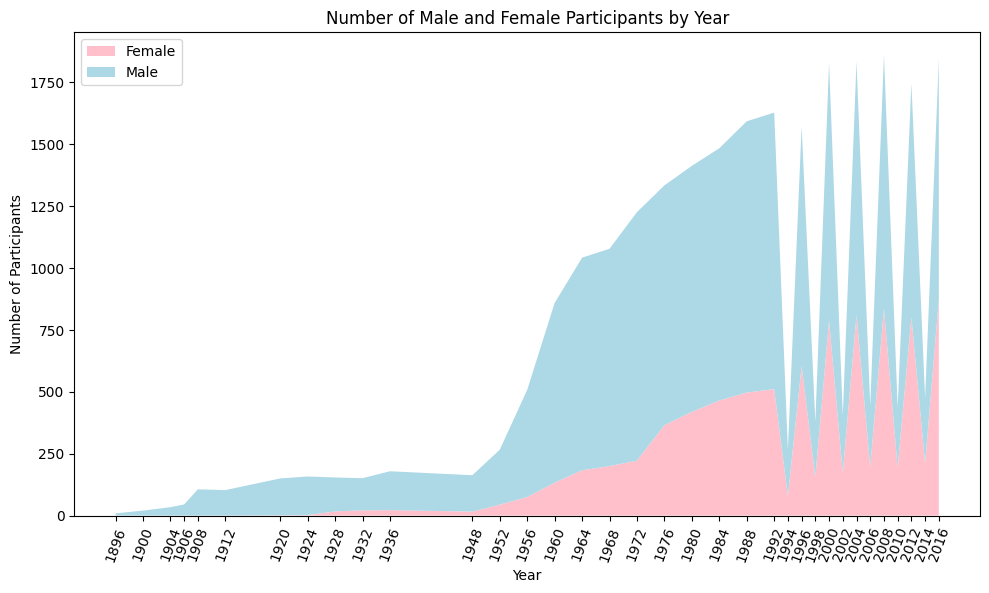

In [55]:
participants_pivot = participants_by_gender_year.pivot(index='Year', columns='Sex', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
plt.stackplot(participants_pivot.index, participants_pivot['F'], participants_pivot['M'],
              labels=['Female', 'Male'], colors=['pink', 'lightblue'])

# Adding title and labels
plt.title('Number of Male and Female Participants by Year')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(participants_pivot.index, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.xticks(rotation= 70)

# Show the plot
plt.show()